<a href="https://colab.research.google.com/github/jear2412/ModEpiAyudantias/blob/main/SIRGillespie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
#Algoritmo Gillespie


import numpy as np
import scipy
import scipy.stats
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


sns.set_theme(style="darkgrid")

In [78]:
# Gillespie para SIR
def Gillespie(tmax, beta, gamma, x0, t0=0 ):
  v= np.array( [ [-1,1,0],[0,-1,1]    ] ) #estequiometrias
  xt= np.append(t0, x0)
  x= x0
  t= t0
  n= np.sum(x0)

  while t<tmax:
    r1=scipy.stats.uniform.rvs(1)
    r2=scipy.stats.uniform.rvs(1)
    a=np.array( [ beta*x[0]*x[1]/ n,    gamma*x[1] ]) #propensidades
    if any(a>0):
      tau=-np.log(1/r1)/np.sum(a) #generar tiempo exp
      custm = scipy.stats.rv_discrete(name='custm', values=( np.arange(2), a/np.sum(a))) #elegir propensidad que cambia
      s= int(custm.rvs(size=1)) 
      t=t+tau
      x=x+v[s]
      temp=np.append(t, x)
      xt=np.vstack( (xt, temp ))
    else: 
      t=tmax+1
  
  return xt





In [79]:
#Ejemplo 
N=100
tmax=30
beta=2
gamma=0.1
S0=N-2
I0=2
R0=0

x0=np.array([ S0, I0, R0  ])

xt1=Gillespie(tmax, beta, gamma, x0, t0=0 )

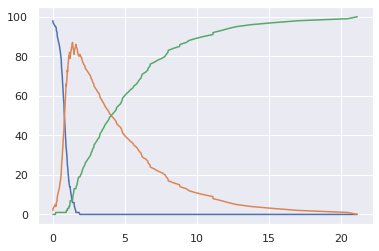

In [89]:
plt.plot(xt1[:,0] , xt1[:,1])
plt.plot(xt1[:,0] , xt1[:,2])
plt.plot(xt1[:,0] , xt1[:,3])
plt.xlabel('t')
plt.ylabel('Conteos')
plt.title('Gillespie SIR')


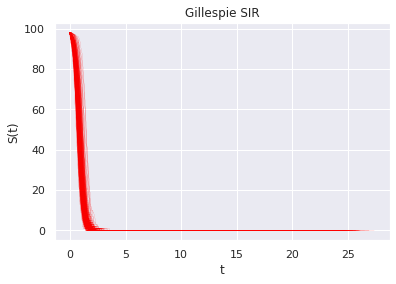

In [99]:
#500 simulations
for i in range(500):
  temp=Gillespie(tmax, beta, gamma, x0, t0=0 )
  plt.plot(temp[:,0] ,temp[:,1], color='red', linewidth=0.10 )

plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Gillespie SIR')
plt.savefig('gSt.png', dpi=500 )
plt.show()

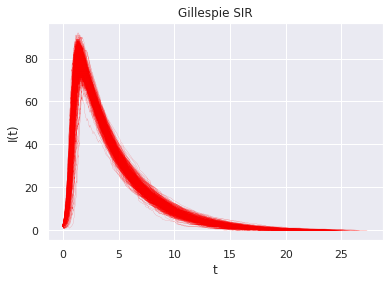

In [98]:
#500 simulations
for i in range(500):
  temp=Gillespie(tmax, beta, gamma, x0, t0=0 )
  plt.plot(temp[:,0] ,temp[:,2], color='red', linewidth=0.10 )

plt.xlabel('t')
plt.ylabel('I(t)')
plt.title('Gillespie SIR')
plt.savefig('gIt.png', dpi=500 )
plt.show()



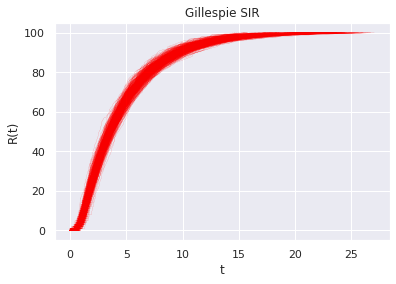

In [100]:
#500 simulations
for i in range(500):
  temp=Gillespie(tmax, beta, gamma, x0, t0=0 )
  plt.plot(temp[:,0] ,temp[:,3], color='red', linewidth=0.10 )

plt.xlabel('t')
plt.ylabel('R(t)')
plt.title('Gillespie SIR')
plt.savefig('gRt.png', dpi=500 )
plt.show()